## Imports

In [2]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

## Base de dados de exemplo

In [3]:
data = pd.read_csv('../clustering/Data.csv').drop('Unnamed: 0', axis = 1)

print(f'Nº colunas: {data.shape[1]} | Nº linhas: {data.shape[0]}')
data.head()

Nº colunas: 10 | Nº linhas: 8068


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


## Função para formatar valores no gráfico (K, M)

In [4]:
def formata_valores(number):
    """
    Formata valores. K-mil, M-milhoes, B-bilhoes.
    Fonte: https://gist.github.com/Abdelkrim/02e604fc38e7f35969e5552f13e4af0a
    """
    for unit in ['','K','M']:
        if abs(number) < 1000.0:
            return f"{number:6.0f}{unit}".strip()
        number /= 1000.0
    return f"{number:6.1f}B".strip().replace('.0', '')

## Ridgeline plot

In [5]:
def ridgeline_plot(df, coluna_categorias, coluna_valores):

    fig = go.Figure()

    # cores = {'cat1':'#1696d2',
    #          'cat2':'#ec008b',
    #          'cat3':'#fdbf11',
    #          'cat4':'#5c5859'}

    for idx, profissao in enumerate(df[df[coluna_categorias].notna()][coluna_categorias].unique()):
        tmp_base = df[df.Profession == profissao].copy()
        # tmp_base['cor'] = tmp_base['Profession'].map(cores)
        tmp_base = tmp_base.reset_index()

        _ = fig.add_trace(
                go.Violin(
                    x = tmp_base[coluna_valores],
                    name = tmp_base.Profession.iloc[0]
                    # marker_color = tmp_base['cor'][0]
                ),
            )

    _ = fig.update_traces(orientation = 'h', 
                            side = 'positive',
                            width = 4,
                            points = False)

    _ = fig.update_layout(height = max((idx+1) * 80, 300), 
                            title = f"Distribuição de {coluna_valores} por {coluna_categorias}", 
                            title_x = 0.5,
                            xaxis_showgrid = False, 
                            xaxis_zeroline = False)

    fig.show()

In [6]:
ridgeline_plot(df = data, coluna_categorias = 'Profession', coluna_valores = 'Age')

# Distribuição - absoluto em barras e percentual em linhas

In [ ]:
def graf_barras_linhas(df, eixo_x, padding = 0.3):

    # base de dados ------------------------------------------------------------------------------------

    tmp = df[eixo_x].value_counts().reset_index().sort_values([eixo_x]).reset_index(drop = True)
    tmp['total'] = tmp['count'].sum()
    tmp['pct'] = tmp['count'] * 100 / tmp['total']

    fig, ax = plt.subplots(2,
                    figsize=(20, 6), 
                    height_ratios=[1, 2], 
                    sharex=True)

    # percentual ---------------------------------------------------------------------------------------

    sns.lineplot(x=tmp[eixo_x].astype(str), y=(tmp['pct']), marker='o', ax=ax[0], markersize=5,
                color = 'steelblue')
    for idx, pct in (tmp['pct']).items():
        ax[0].text(idx, pct + padding, f'{pct:.1f}%', ha='center', size = 8)
    ax[0].set_ylabel(f"percentual")

    # número absoluto ----------------------------------------------------------------------------------

    sns.barplot(x=tmp[eixo_x].astype(str), 
                y=tmp['count'], 
                ax=ax[1],
                color = 'steelblue')
    ax[1].bar_label(ax[1].containers[0], fmt = formata_valores, size = 8)
    ax[1].set_ylabel(f"absoluto")

    plt.xlabel(f'{eixo_x}')
    plt.xticks(fontsize = 7)
    plt.yticks(fontsize = 7)
    sns.despine(bottom=True)
    plt.show()

In [35]:
def graf_barras_linhas_recorte(df, eixo_x, recorte, padding = 0.3):

    # base de dados ------------------------------------------------------------------------------------

    tmp = df.groupby(recorte)[eixo_x].value_counts().reset_index().sort_values([recorte, eixo_x]).reset_index(drop = True)
    tmp['total'] = tmp.groupby(recorte)['count'].transform(sum)
    tmp['pct'] = tmp['count'] * 100 / tmp['total']

    for categoria in tmp[recorte].unique():

        fig, ax = plt.subplots(2,
                        figsize=(20, 6), 
                        height_ratios=[1, 2], 
                        sharex=True)

        tmp_prof = tmp[tmp[recorte] == categoria].reset_index(drop = True)

        # percentual ---------------------------------------------------------------------------------------

        sns.lineplot(x=tmp_prof[eixo_x].astype(str), y=(tmp_prof['pct']), marker='o', ax=ax[0], markersize=5,
                    color = 'steelblue')
        for idx, pct in (tmp_prof['pct']).items():
            ax[0].text(idx, pct + padding, f'{pct:.1f}%', ha='center', size = 8)
        ax[0].set_ylabel(f"percentual")

        # número absoluto ----------------------------------------------------------------------------------

        sns.barplot(x=tmp_prof[eixo_x].astype(str), 
                    y=tmp_prof['count'], 
                    ax=ax[1],
                    color = 'steelblue')
        ax[1].bar_label(ax[1].containers[0], fmt = formata_valores, size = 8)
        ax[1].set_ylabel(f"absoluto")

        plt.xlabel(f'{eixo_x} - {categoria}')
        plt.xticks(fontsize = 7)
        plt.yticks(fontsize = 7)
        sns.despine(bottom=True)
        plt.show()

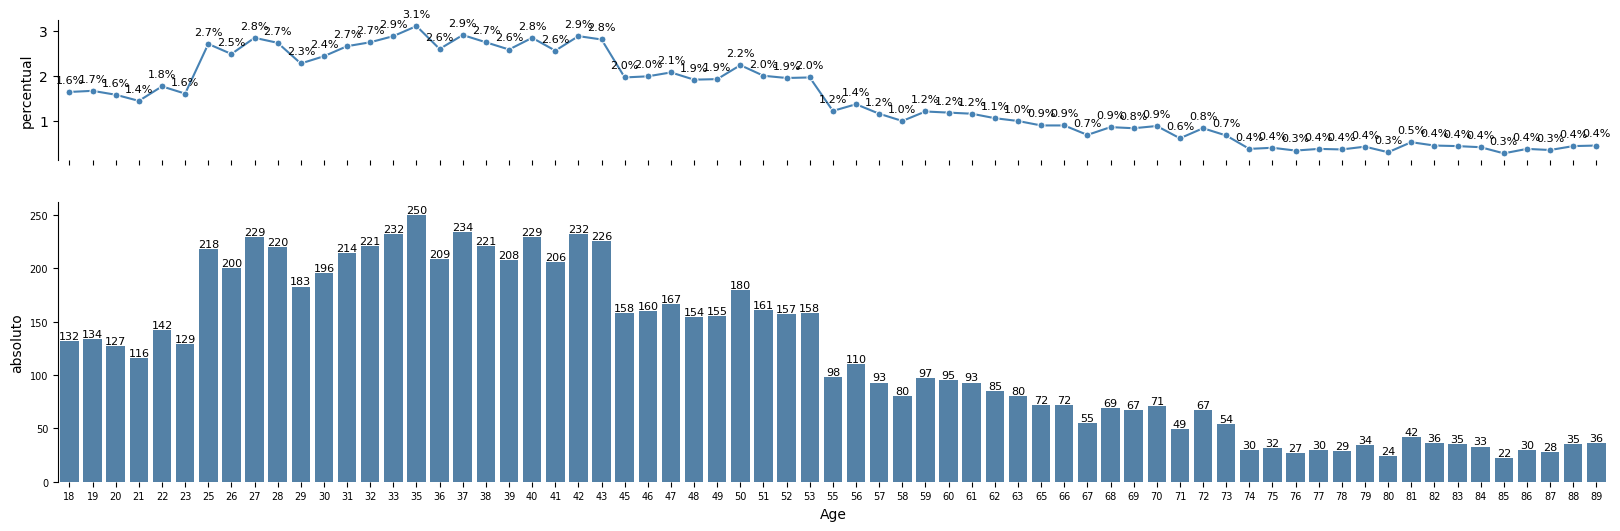

In [41]:
graf_barras_linhas(df = data, eixo_x = 'Age', padding = 0.2)

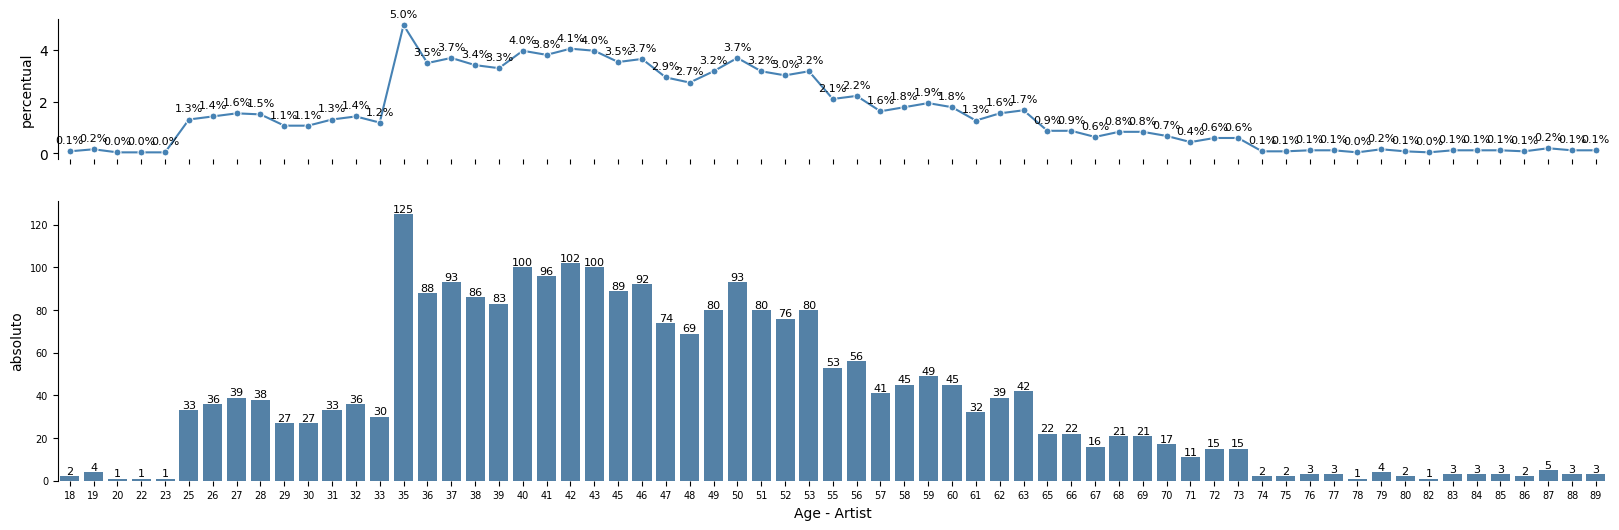

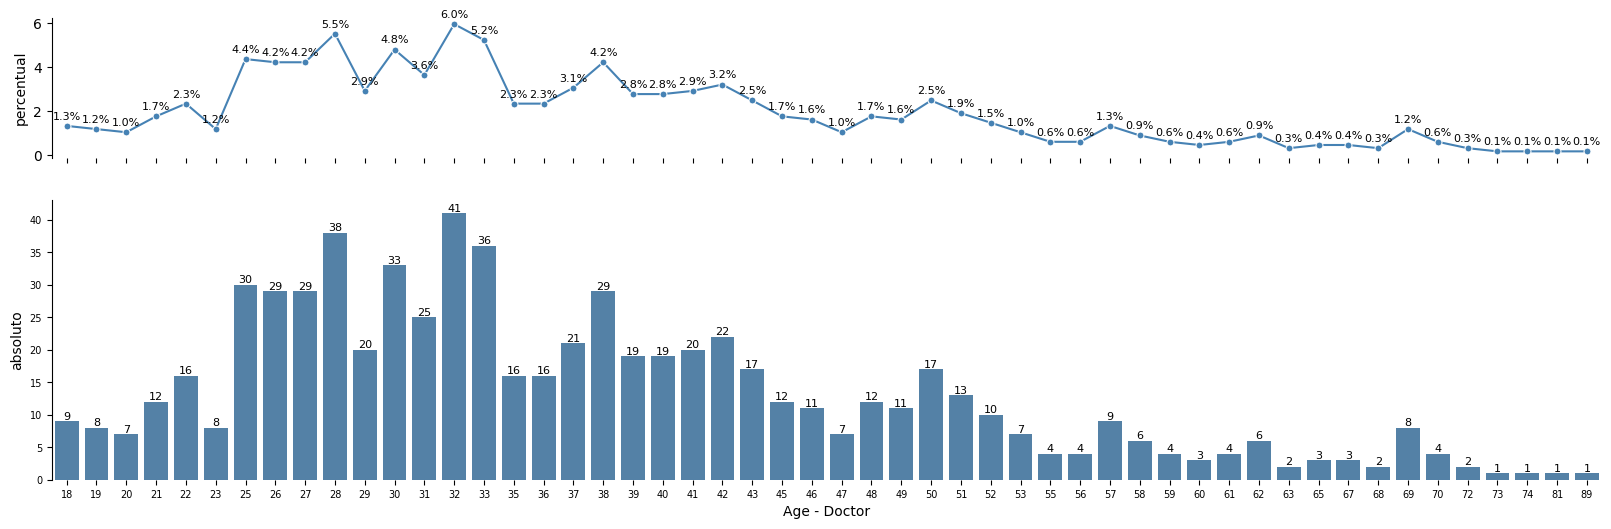

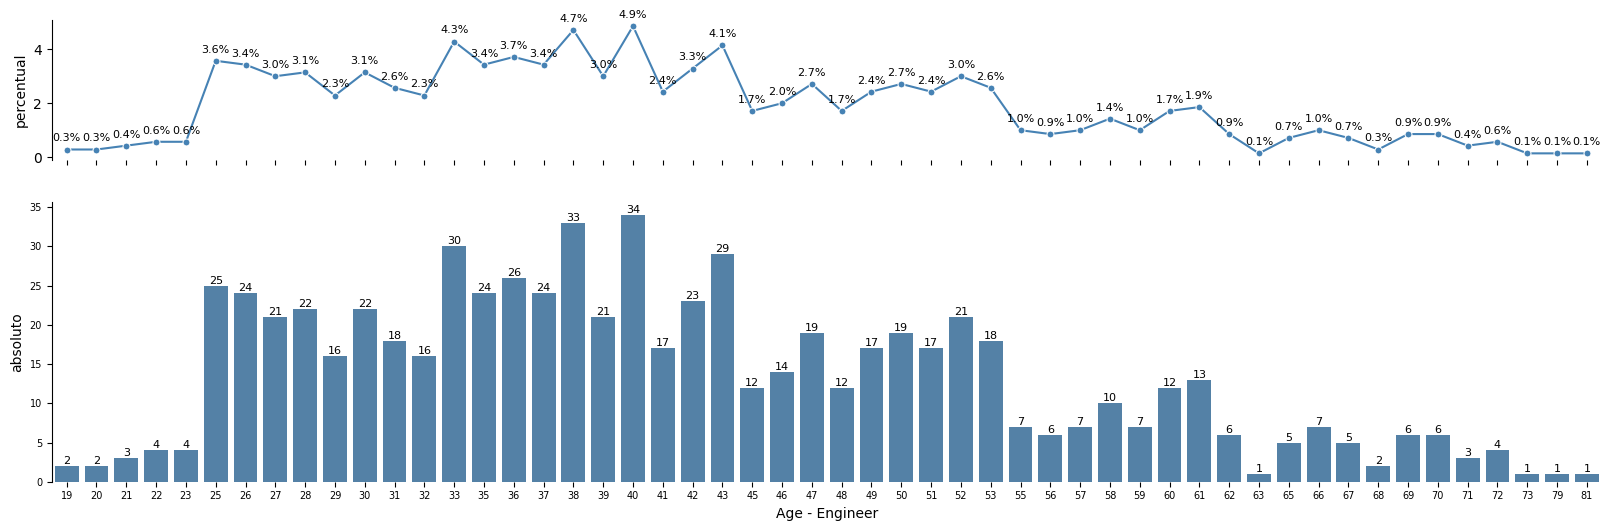

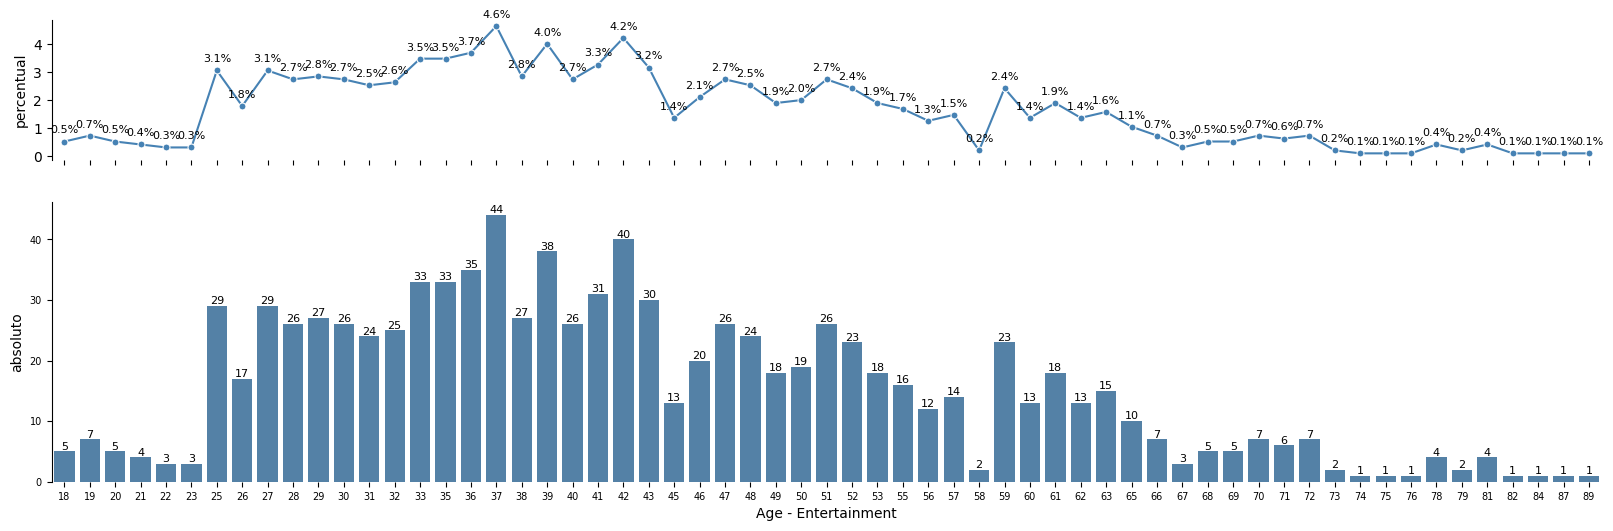

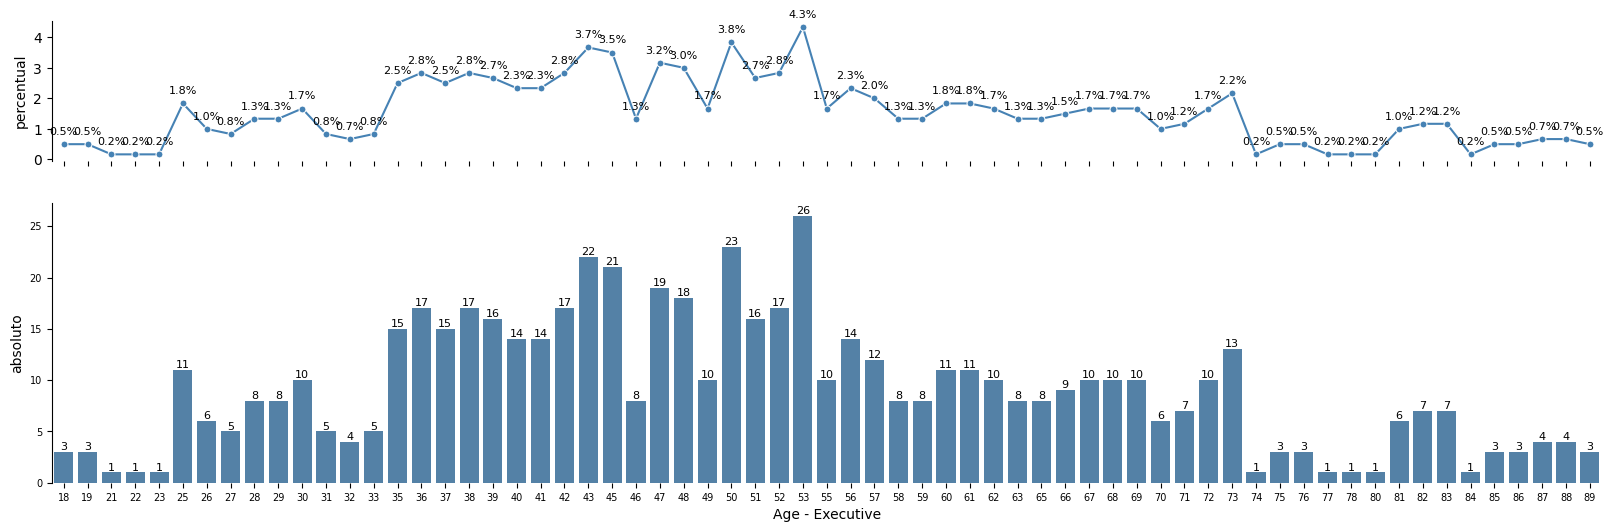

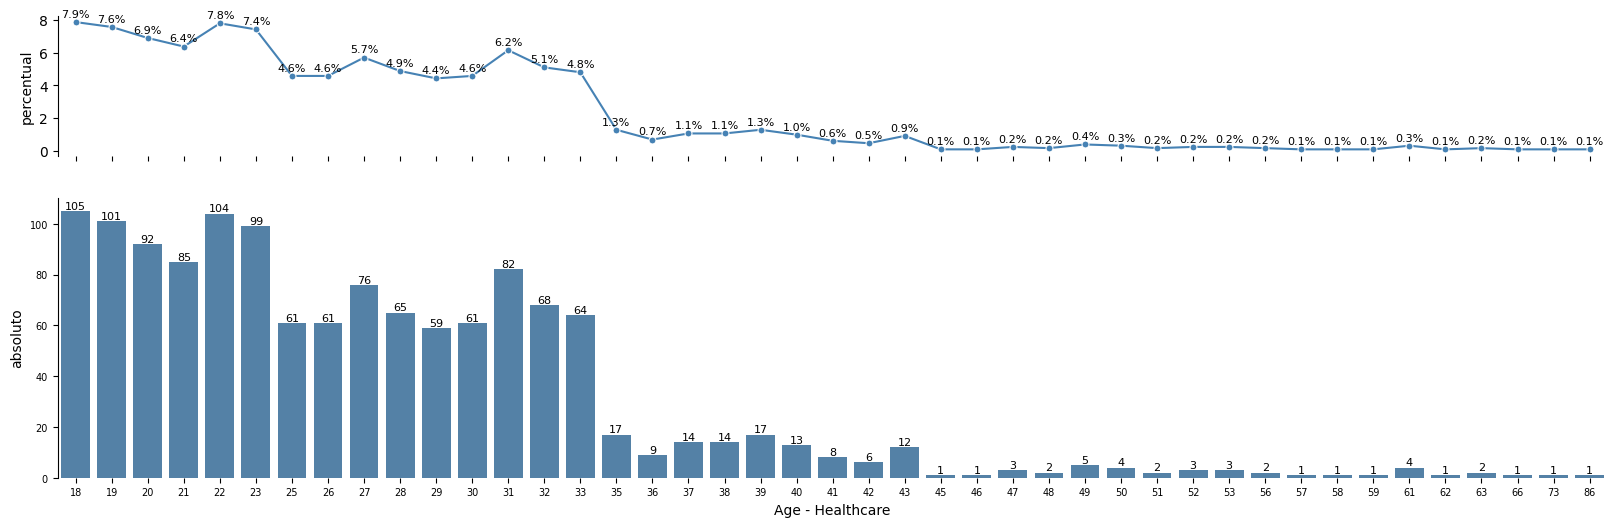

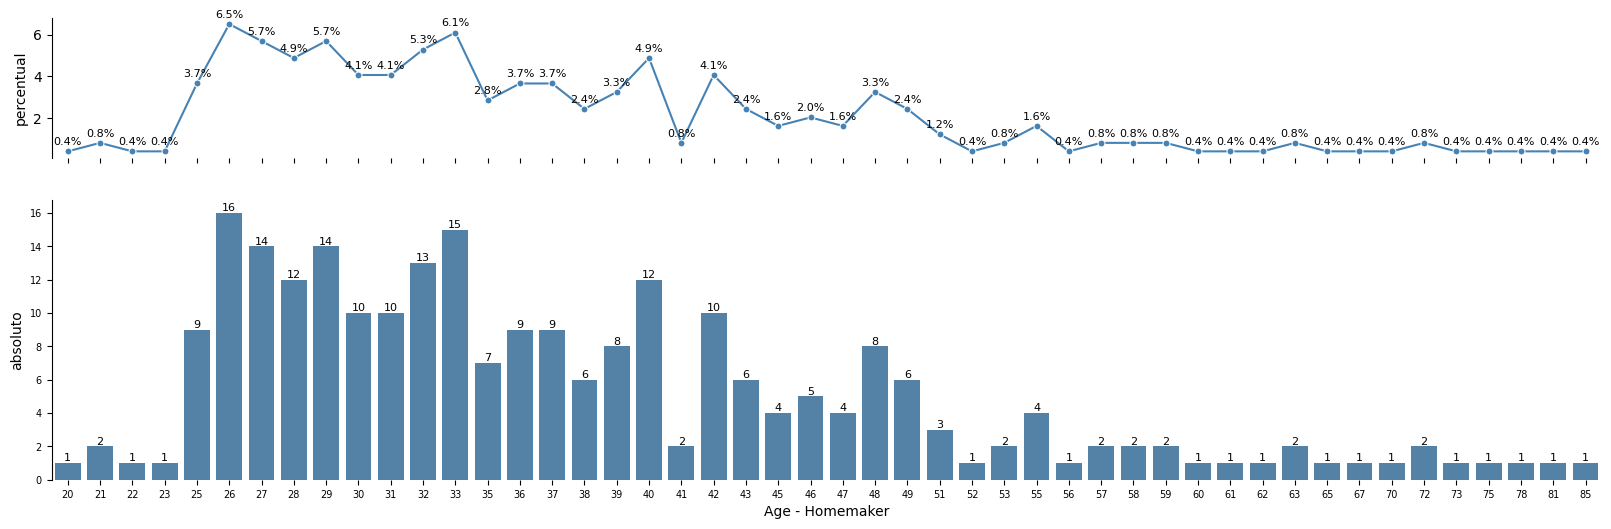

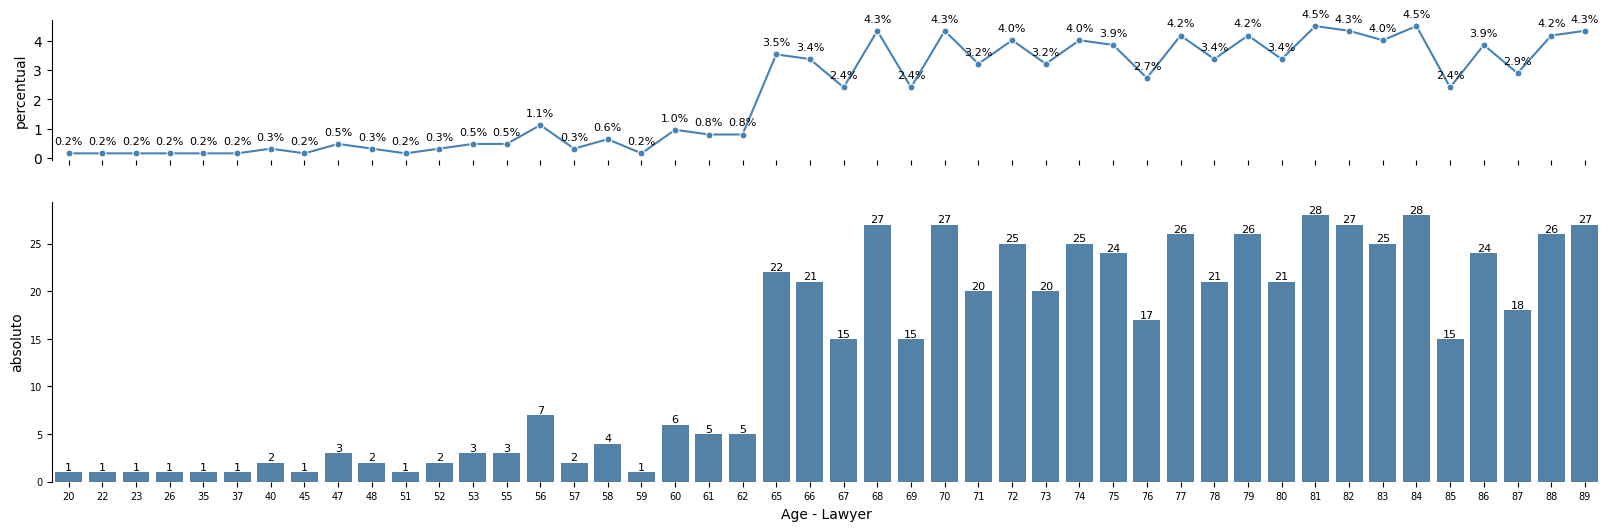

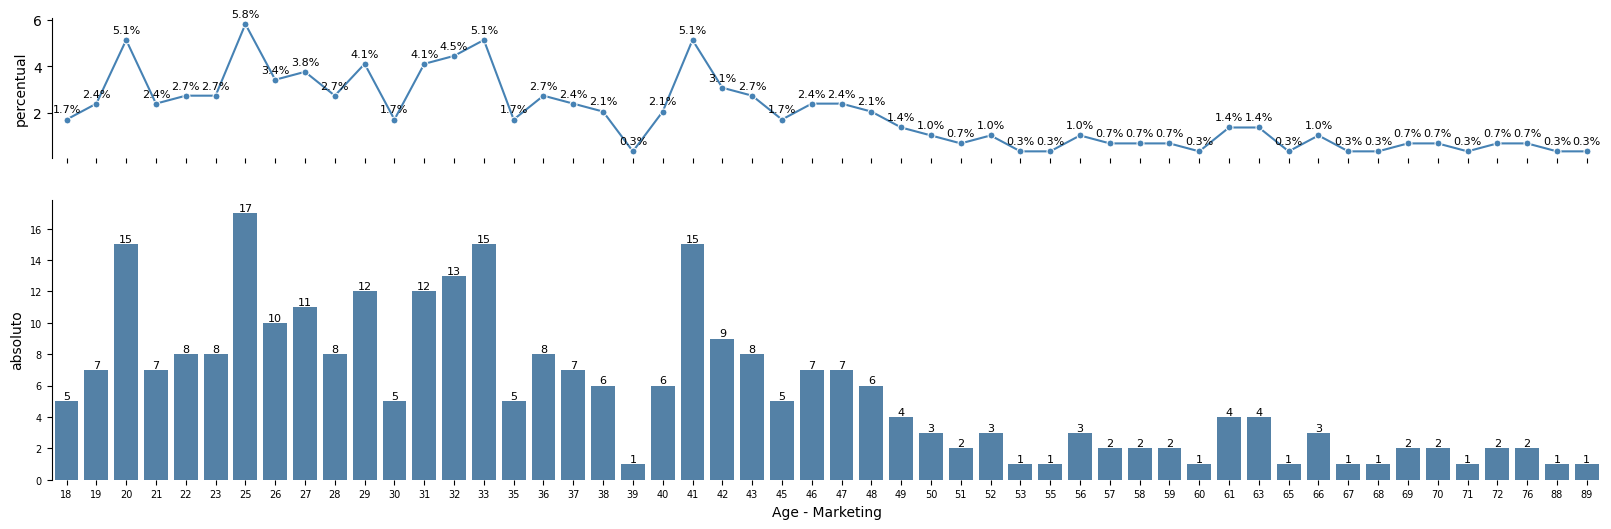

In [36]:
graf_barras_linhas_recorte(df = data, eixo_x = 'Age', recorte = 'Profession', padding = 0.3)

# Gráfico de pareto

In [44]:
def pareto(df, column, agg_col = 'hash_atendimento', agg_op = 'nunique', ylabel = 'atendimentos', n = 10, padding = 3, size = (20,6)):
    tmp = df[column].value_counts().reset_index()#.sort_values(by = agg_col, ascending=False)
    tmp['pct'] = (tmp['count']/tmp['count'].sum()).cumsum() * 100

    fig, ax = plt.subplots(2, figsize=size, height_ratios = [1, 2], sharex=True)

    sns.lineplot(x = tmp.head(n)[column].astype(str), y=(tmp['pct']).head(n), marker='o', ax=ax[0], markersize=8, color = 'steelblue')
    for idx, pct in (tmp['pct'].head(n)).items():
        ax[0].text(idx, pct+padding, f'{pct:.2f}%', ha='center', size = 8)
    ax[0].set_ylabel(f'pct_{ylabel}')

    sns.barplot(x=tmp.head(n)[column].astype(str), y=tmp['count'].head(n), ax=ax[1],
            color = 'steelblue')
    ax[1].bar_label(ax[1].containers[0], fmt=formata_valores, size = 8)
    ax[1].set_ylabel(f'num_{ylabel}')

    plt.xlabel(column)
    plt.xticks(rotation = 90, fontsize = 9)
    plt.yticks(fontsize = 7)
    sns.despine(bottom=True)
    plt.show()

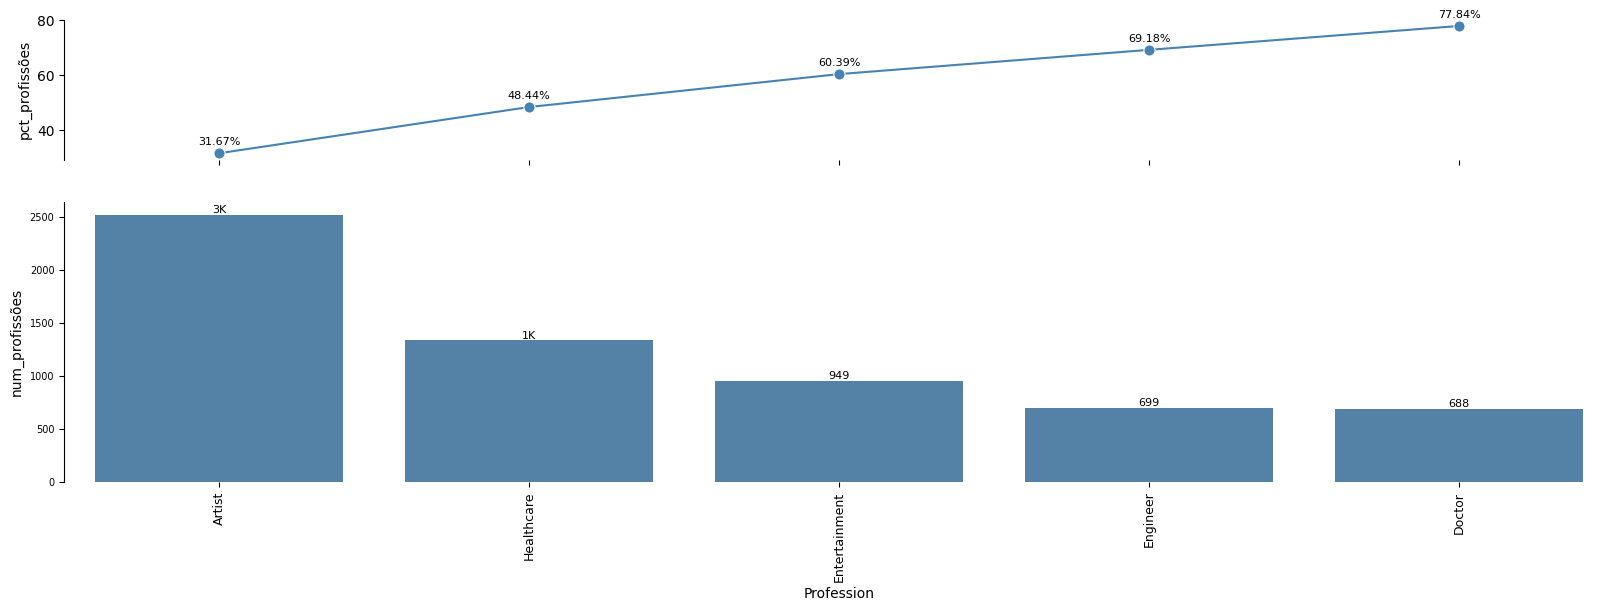

In [47]:
pareto(df = data, column = 'Profession', ylabel = 'profissões', n = 5)

# Crosstab

In [54]:
# marca

def grafico_crosstab(df, eixo_x, eixo_y, normalize = 'index', figsize = (16, 9)):

    crosstab = pd.crosstab(df[eixo_y], df[eixo_x], margins = False, normalize = normalize)

    plt.figure(figsize = figsize)
    ax = sns.heatmap(crosstab, cmap = 'Greens', annot = True, annot_kws={'size': 8}, fmt=".1%")

    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)

    ax = ax

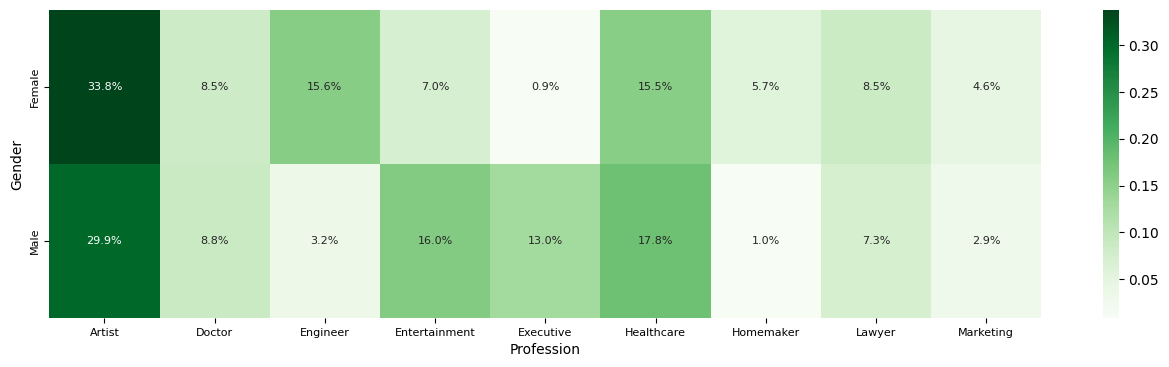

In [55]:
grafico_crosstab(df = data, eixo_x = 'Profession', eixo_y = 'Gender', normalize = 'index', figsize = (16, 4))

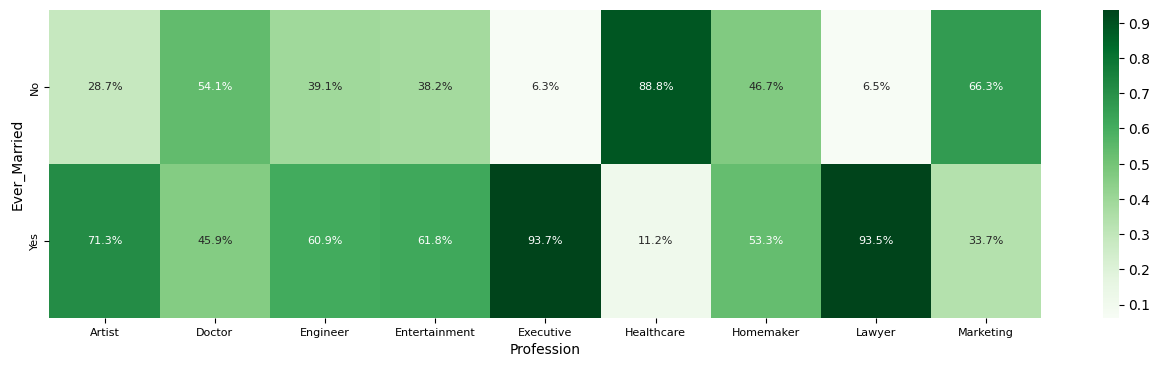

In [56]:
grafico_crosstab(df = data, eixo_x = 'Profession', eixo_y = 'Ever_Married', normalize = 'columns', figsize = (16, 4))